## HW05

## Problem 1 
### Linear congruential random number generator:

#### 'gen_ random' function generates random number by using the following paramaters:
#### $a=5$ , $c=0 $ and $x0 =1$
#### 'gen_ random_ibm' function generates random number by using IBM parameters 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot


In [2]:
# Random number genrator  with certain parameters 


def gen_random (x0,N):
    a = 5 
    M = 11
    x = np.zeros(N)
    x[-1] = x0
    for i in range (0,N):
        x[i] = (a * x[i-1] ) % M
    for i in range (0,N):
        x[i]=float(x[i]) / float (M)
    return x

# Random number genrator  with IBM parameters 

def gen_random_ibm (x0,N): 
    a = 65539 
    M =  2**31
    x = np.zeros(N)
    x[-1] = x0
    for i in range (0,N):
        x[i] = (a * x[i-1] ) % M
    for i in range (0,N):
        x[i]=float(x[i]) / float (M)
    return x




### Hit and Miss

#### $a=5$ , $c=0 $ 

Text(0.5, 1.0, 'a=5 , M=11')

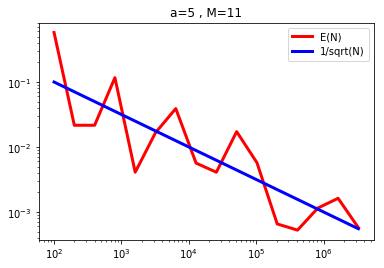

In [4]:
# Using gen_random

ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
x0=1 # seed 
y=[x0]

for i in range(ngroups):

    N[i] = n0
    x = gen_random(y[-1],n0)
    #print (x)
    y = gen_random(x[-1],n0)
    #print(y)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    #print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3,label='E(N)');
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3, label='1/sqrt(N)');
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.title('a=5 , M=11')

#### IBM parameters 

Text(0.5, 1.0, 'IBM parameters')

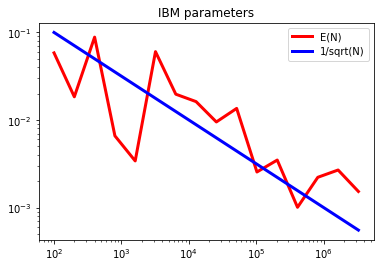

In [5]:
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
x0=1 # seed 
y=[x0]
for i in range(ngroups):

    N[i] = n0
    x = gen_random_ibm(y[-1],n0)
    y = gen_random_ibm(x[-1],n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    #print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3,label='E(N)');
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3, label='1/sqrt(N)');
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.title('IBM parameters')

### Simple MC 

#### $a=5$ , $c=0 $ 

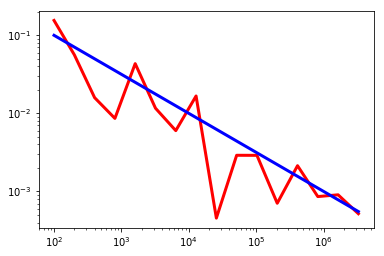

In [6]:
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)
r=[1]
n0 = 100
for i in range(ngroups):

    N[i] = n0
    r = gen_random_ibm(r[-1],n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *= 4./float(n0)
    E[i] = abs(I[i]-np.pi)
    #print(n0,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xscale('log')
pyplot.yscale('log')

#### IBM parameters 

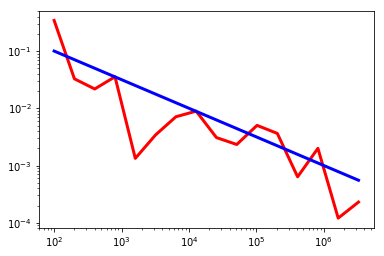

In [7]:
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)
r=[1]
n0 = 100
for i in range(ngroups):

    N[i] = n0
    r = gen_random(r[-1],n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *= 4./float(n0)
    E[i] = abs(I[i]-np.pi)
    #print(n0,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xscale('log')
pyplot.yscale('log')

### Part 3 and 4 

#### $a=5$ , $c=0 $ 

In [8]:
# Part 3 and Part 4
n0 = 100000
I = np.zeros(n0)
r = gen_random(1,n0)
for j in range(n0):
    x = r[j]
    I[j] = 4*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0/ngroups
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(int(n*nmeasurements),int((n+1)*nmeasurements)):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = Ig2-Ig**2
        print(Ig,Ig2,sigma)
        
group_measurements(10)
print("=============================")
group_measurements(20)
print("=============================")
group_measurements(1)


3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.50909090909085 0.36986116766630417
3.4841397419484403 12.509090909

#### IBM Parameters 

In [9]:
# Part 3 and Part 4
n0 = 100000
I = np.zeros(n0)
r =gen_random_ibm(1,n0)
for j in range(n0):
    x = r[j]
    I[j] = 4*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0/ngroups
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(int(n*nmeasurements),int((n+1)*nmeasurements)):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = Ig2-Ig**2
        print(Ig,Ig2,sigma)
        
group_measurements(10)
print("=============================")
group_measurements(20)
print("=============================")
group_measurements(1)


3.1431460238758584 10.671188333937273 0.791821406530655
3.1354732425337266 10.628090763025293 0.7968983083803316
3.1184980875416577 10.547511611451723 0.8224812894507458
3.13062759024454 10.619928067374293 0.8190989585739583
3.14302584192932 10.678413459687128 0.7998020166516167
3.1518524152223004 10.725142838015302 0.7909691906726533
3.134465517749081 10.623931053690171 0.7990569717321563
3.1228103462466485 10.55611992590541 0.804175467280297
3.1400740000484317 10.646354403521768 0.7862896777416086
3.14168646154016 10.662153101656605 0.7919592790318752
3.147374251480726 10.694926290293933 0.7889616114100715
3.138917796270979 10.647450377580634 0.7946454458339751
3.129177761396739 10.609485729620605 0.8177322672006984
3.1417687236706975 10.646695796429933 0.775985083394529
3.1293318315847576 10.597647551868661 0.8049298396990476
3.1076643434985534 10.497375671034776 0.8397979991824815
3.1461484131759265 10.706082456878923 0.8078326191495222
3.115106767313166 10.533773677869734 0.829883

## Problem 2 


$\int _0^1{x^2dx} = \frac{1}{3}= 0.3333$
### Simple MC integration :

In [24]:
#Boundries
a=0
b=1
h=1

N=1000000 # total number of points 
Nin=0 # number of acceptance
x=np.random.random(N)
y=np.random.random(N)

for i in range (0,N):
    if (y[i] < x[i]**2):
        Nin += 1
        
I = (b-a) * h * Nin / N 

print ('*****************\n I =',I,'\n*****************')



*****************
 I = 0.3332763 
*****************


### Importance sampling 
 $p(x)=2x$ 
 
 $\int _0^1{p(x) dx} =1 $
 
 $y(x)= \sqrt x$
 
 $ I = \frac{1}{N} \sum_{i=1}^N \frac{y_i^2}{2y_i} =  \frac{1}{N} \sum_{i=1}^N \frac{y_i}{2}$
 

In [34]:
N=1000000

x=np.random.random(N)

y=np.sqrt(x)

I =0 

for i in range(0,N):
    I += y[i]/2

I=I/N

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.3332862253656083 
*************************


## Problem 3


$\int _0^1{\sqrt x dx} = \frac{2}{3}= 0.666667$
### Simple MC integration :

In [36]:
#Boundries
a=0
b=1
h=1

N=1000000 # total number of points 
Nin=0 # number of acceptance
x=np.random.random(N)
y=np.random.random(N)

for i in range (0,N):
    if (y[i] < np.sqrt(x[i])):
        Nin += 1
        
I = (b-a) * h * Nin / N 

print ('*****************\n I =',I,'\n*****************')



*****************
 I = 0.666619 
*****************


### Generating random number with the following distribution  (Metropolis Algorithm): 
### $p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $

[ 0.6         0.47945946  0.50775645 ... 37.15371712 37.37232642
 37.25949244]


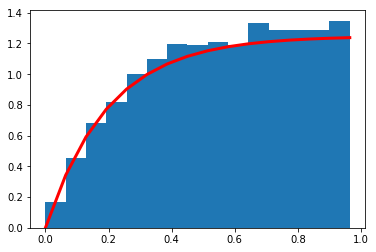

In [70]:
N = 200000

x = np.zeros(N)
delta = 0.0643
a=5

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = (1 - np.exp(-a*xtrial)) / (1 - np.exp(-a*xold))
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

###
x[0] = 0.6

for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        if (x0 != 0 ):
             x0 = metropolis(x0)
    x[i] = metropolis(x0)

binwidth=delta
pyplot.hist(x,bins=np.arange(0,1, binwidth),density=True);

norm = a / (a - 1 + np.exp(-a))

pyplot.plot(np.arange(0,1,binwidth),norm*(1 - np.exp(-a*np.arange(0,1, binwidth))),ls='-',c='red',lw=3)


### Importance sampling 
$p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $
 
 $\int _0^1{p(x) dx} =1 $
 $f(x)= \sqrt x$
 
 $ I = \frac{1}{N} \sum_{i=1}^N \frac{\sqrt x}{N (1-e^{-ax})}=0.666667 $
 

In [71]:

I =0 
n=0
for i in range(0,N):
    if (x[i] <= 1 and x[i] >=0): 
        n +=1
        I += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 

I=I/n

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.6683676042896608 
*************************


### Generating random number with the following distribution  (Von Newmann rejection): 
### $p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $

Acceptance Ratio:  0.7212


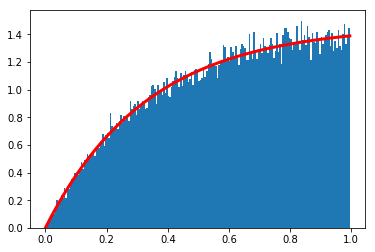

In [31]:
N = 100000
a=3
norm = a / (a - 1 + np.exp(-a))

xmax = 1
ymax = norm * (1-np.exp(-a * xmax))

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(0,N):
    if(ry[i] <= (norm * (1-np.exp(-a * rx[i])))):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=1/200
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,xmax, binwidth),density=True);
pyplot.plot(np.arange(0.,xmax,binwidth),norm*(1 - np.exp(-a*np.arange(0,xmax, binwidth))),ls='-',c='red',lw=3);


### Importance sampling 

In [33]:
I =0 

for i in range(0,len(x)):
    I += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 

I=I/len(x)

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.6666184676698907 
*************************


### dependence of variance on 'a' using Van Neumann rejection 

0.6665300928101864


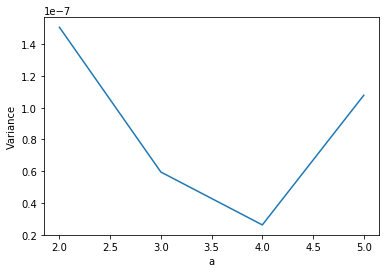

In [40]:
Ni=10 # Number of iteration to calculate the integral 
N = 100000 # number of points 
x = np.zeros(N) # random numbers 
aarray=np.arange(2,6,1)
variance=np.zeros(len(aarray))

for l in range(len(aarray)):
        a=aarray[l]
        norm = a / (a - 1 + np.exp(-a))
        xmax = 1
        ymax = norm * (1-np.exp(-a * xmax))
        I=0
        I2=0

        for k in range (Ni):
            rx = np.random.random(N)*xmax
            ry = np.random.random(N)*ymax
            values = []
            Ii=0
            for i in range(0,N):
                if(ry[i] <= (norm * (1-np.exp(-a * rx[i])))):
                    # Accept
                    values.append(rx[i])
            x = np.asarray(values)
            for i in range(0,len(x)):
                Ii += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 
            I += Ii/len(x)
            I2 += (Ii/len(x))**2
            
        var = I2/Ni - (I/Ni)**2
        variance[l] = var 
    
pyplot.plot(aarray,variance)  
pyplot.xlabel('a')
pyplot.ylabel('Variance')

  